<a href="https://colab.research.google.com/github/PradeepKumarM30/WinterSemester2020-21/blob/DeepLearning/20MAI0030EX1/QNO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#make sure youre in the right directory
cd sample_data

/content/sample_data


In [4]:
#unzip the dataset into the current directory
!unzip classified_data.zip


Archive:  classified_data.zip
   creating: data/
   creating: data/test/
   creating: data/test/cat/
  inflating: data/test/cat/cat.1.jpg  
  inflating: data/test/cat/cat.10.jpg  
  inflating: data/test/cat/cat.100.jpg  
  inflating: data/test/cat/cat.10000.jpg  
  inflating: data/test/cat/cat.10015.jpg  
   creating: data/test/dog/
  inflating: data/test/dog/dog.10003.jpg  
  inflating: data/test/dog/dog.10008.jpg  
  inflating: data/test/dog/dog.10009.jpg  
  inflating: data/test/dog/dog.10024.jpg  
  inflating: data/test/dog/dog.10058.jpg  
   creating: data/train/
   creating: data/train/cat/
  inflating: data/train/cat/cat.0.jpg  
  inflating: data/train/cat/cat.10003.jpg  
  inflating: data/train/cat/cat.10004.jpg  
  inflating: data/train/cat/cat.10008.jpg  
  inflating: data/train/cat/cat.1002.jpg  
  inflating: data/train/cat/cat.10028.jpg  
  inflating: data/train/cat/cat.10066.jpg  
  inflating: data/train/cat/cat.10125.jpg  
  inflating: data/train/cat/cat.10148.jpg  
  inf

In [23]:
#load imports
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [11]:
#giving the file paths for the required files and naming them to our required format
labels = ['dog', 'cat']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [12]:
#split into train and validation
train = get_data('/content/sample_data/data/train')
val = get_data('/content/sample_data/data/test')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'dog')

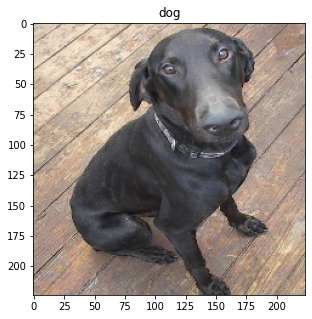

In [15]:
  #Now we will look into some sample images
  plt.figure(figsize = (5,5))
  plt.imshow(train[1][0])
  plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'cat')

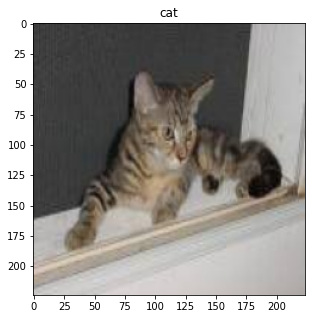

In [16]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [17]:
#scale all images such that its pixel values lie between 0 and 1..
#add training images and validation images to respective array bins
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [21]:
#In this exercise we are dealing with veryu small dataset, so we can augment images to get better accuracy
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [24]:
#Though convolutional models is not required for this images, as it can help learning the keras package and its models i used it
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [25]:
#This compiles the model with adam optimiser and assigning croos entropy loss function to it
#it achieves a peak accuracy of 0.93 if early stopping is done
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [26]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 0.6868 - accuracy: 0.5938 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 2s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 2s 2s/step - loss: 0.6926 - accuracy: 0.5625 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 2s 2s/step - loss: 0.6912 - accuracy: 0.5000 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 2s 2s/step - loss: 0.6967 - accuracy: 0.3750 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 2s 2s/step - loss: 0.6963 - accuracy: 0.5625 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 2s 2s/step - loss: 0.6852 - accuracy: 0.5938 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 8/500
1/1 [=================

In [27]:
#Lets see how well our model behaves on the vlaidation data
predictions = model.predict_classes(x_train)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_train, predictions, target_names = ['Cat (Class 0)','Dog (Class 1)']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


               precision    recall  f1-score   support

Cat (Class 0)       0.94      0.94      0.94        16
Dog (Class 1)       0.94      0.94      0.94        16

     accuracy                           0.94        32
    macro avg       0.94      0.94      0.94        32
 weighted avg       0.94      0.94      0.94        32



In [28]:
#The confusion matrix for the training data .. can also be obtained for the testing data by changing the y_train to y_val
conf_mat = confusion_matrix(y_train, predictions)
print(conf_mat)

[[15  1]
 [ 1 15]]


PRADEEP KUMAR M - 20MAI0030


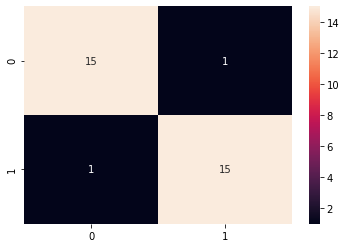

In [29]:
#Heat maps provide better visualisation for teh data
import seaborn as sns
sns.heatmap(conf_mat, annot=True)
print('PRADEEP KUMAR M - 20MAI0030')